In [15]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Step 2: Load the Dataset
df = pd.read_csv("S:/Personal/Internship/Elevvo/EDA-on-Titanic-Dataset/train.csv")  # Ensure train.csv is in the same folder
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [19]:
# Step 3: Basic Info
print(df.head())       # First 5 rows
print(df.info())       # Data types + missing values
print(df.describe())   # Summary stats for numerical features

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [21]:
# Step 4: Check Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
# Step 5: Handle Missing Values
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with most common value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

In [25]:
# Step 6: Convert Data Types (if needed)
# For categorical columns
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [29]:
# Ensure 'Survived' is numeric
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

# Step 7: Summary Statistics & Group Insights
print("Survival rate by gender:")
print(df.groupby('Sex')['Survived'].mean(numeric_only=True))

print("\nSurvival rate by passenger class:")
print(df.groupby('Pclass')['Survived'].mean(numeric_only=True))

print("\nSurvival rate by Embarked location:")
print(df.groupby('Embarked')['Survived'].mean(numeric_only=True))


Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by Embarked location:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


C:\Users\shabb\AppData\Local\Temp\ipykernel_12472\3992875703.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sex')['Survived'].mean(numeric_only=True))
C:\Users\shabb\AppData\Local\Temp\ipykernel_12472\3992875703.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean(numeric_only=True))
C:\Users\shabb\AppData\Local\Temp\ipykernel_12472\3992875703.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

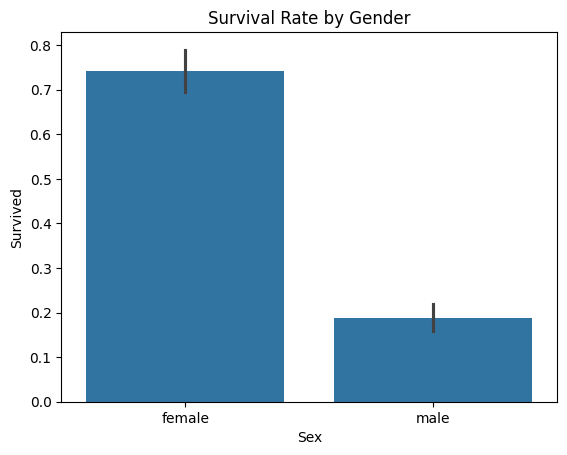

In [31]:
# Step 8: Visualizations

# Bonus 1: Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

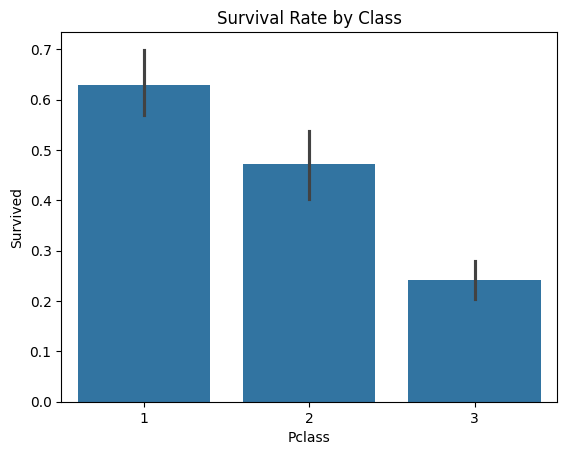

In [33]:
# Survival Rate by Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

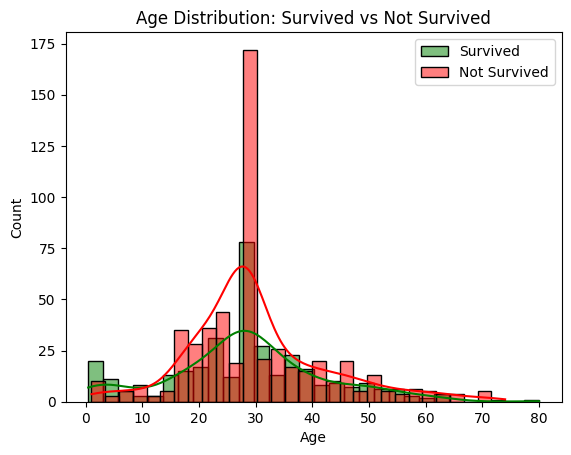

In [35]:
# Age Distribution by Survival
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, color='red', label='Not Survived', kde=True)
plt.legend()
plt.title("Age Distribution: Survived vs Not Survived")
plt.show()

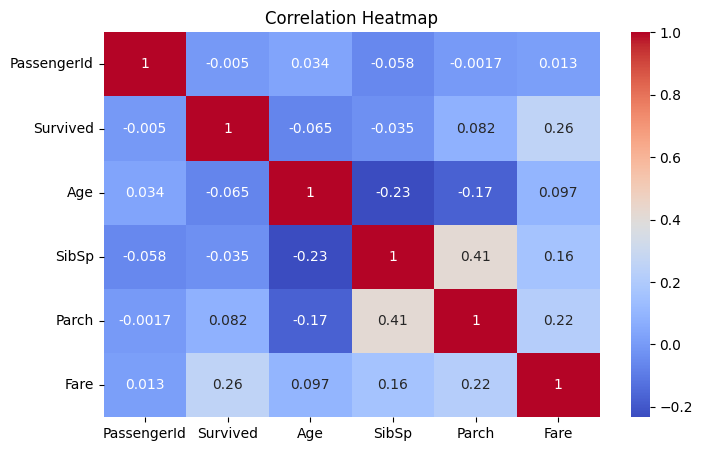

In [37]:
# Step 9: Correlation Heatmap (Numerical Features Only)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

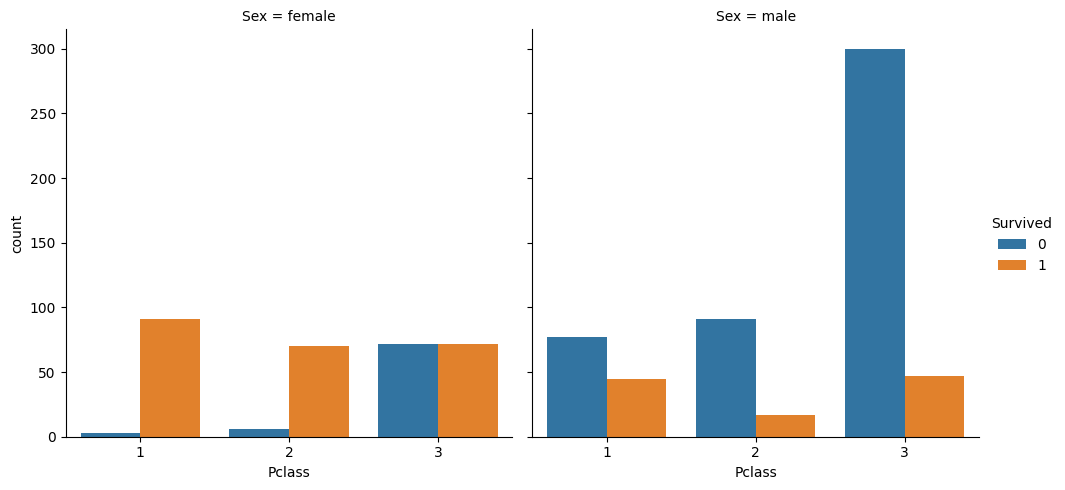

In [39]:
# Bonus 2: Survival by Gender & Class Combined
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.show()